Primer parcial SIS420
*   Universitario: Flores Yampara Felix Antonio
*   Docente: Ing. Pacheco Lora Carlos Walter
*   Ejercicio: D1

# Ejercicio de programación Regresión Lineal Multiple

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = pd.read_csv('/content/gdrive/MyDrive/SIS420 1.2024/primer parcial/D1/Boats_Cleaned_dataset.csv', delimiter=',')
X = data.iloc[:, :19]
y = data.iloc[:, 19]
m = y.size
print(m)

18903


In [4]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [5]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [6]:
print(data)

       Unnamed: 0       id  type  boatClass  make  model  year  condition  \
0               1  7252689     0          8    34   1413  1992          1   
1               3  7228300     0         41   324   3874  2018          1   
2               5  7271336     0         13    70   5258  2020          0   
3               6  7222952     0         16   698   3394  2015          1   
4               8  6824832     0          0   166   3998  1994          1   
...           ...      ...   ...        ...   ...    ...   ...        ...   
18898       19996  7127945     0         33   783   2654  2013          1   
18899       19997  7110910     0         36   709   4860  2013          1   
18900       19998  6935123     0          6   103   1783  2019          0   
18901       19999  7079181     0         33    17   2625  2004          1   
18902       20000  7140924     0         11    70   2918  2002          0   

       length_ft  beam_ft  ...  minEngineYear  engineCategory     price  \


In [7]:
data = data.fillna(0)
data = data.iloc[:, :19]

# Verificar y convertir columnas no numéricas a tipo de datos numéricos
columnas_no_numericas = data.select_dtypes(exclude=['float64', 'int64']).columns
for columna in columnas_no_numericas:
    data[columna] = pd.to_numeric(data[columna], errors='coerce')

print(data)

       Unnamed: 0       id  type  boatClass  make  model  year  condition  \
0               1  7252689     0          8    34   1413  1992          1   
1               3  7228300     0         41   324   3874  2018          1   
2               5  7271336     0         13    70   5258  2020          0   
3               6  7222952     0         16   698   3394  2015          1   
4               8  6824832     0          0   166   3998  1994          1   
...           ...      ...   ...        ...   ...    ...   ...        ...   
18898       19996  7127945     0         33   783   2654  2013          1   
18899       19997  7110910     0         36   709   4860  2013          1   
18900       19998  6935123     0          6   103   1783  2019          0   
18901       19999  7079181     0         33    17   2625  2004          1   
18902       20000  7140924     0         11    70   2918  2002          0   

       length_ft  beam_ft  dryWeight_lb  hullMaterial  fuelType  numEngines

In [8]:
# Seleccionar solo las columnas numéricas para normalizar
X = data.select_dtypes(include=['float64', 'int64'])


In [16]:
X.shape

(18903, 20)

In [17]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    sigma[sigma == 0] = 1
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [10]:
 # llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       Unnamed: 0       id  type  boatClass  make  model  year  condition  \
0               1  7252689     0          8    34   1413  1992          1   
1               3  7228300     0         41   324   3874  2018          1   
2               5  7271336     0         13    70   5258  2020          0   
3               6  7222952     0         16   698   3394  2015          1   
4               8  6824832     0          0   166   3998  1994          1   
...           ...      ...   ...        ...   ...    ...   ...        ...   
18898       19996  7127945     0         33   783   2654  2013          1   
18899       19997  7110910     0         36   709   4860  2013          1   
18900       19998  6935123     0          6   103   1783  2019          0   
18901       19999  7079181     0         33    17   2625  2004          1   
18902       20000  7140924     0         11    70   2918  2002          0   

       length_ft  beam_ft  dryWeight_lb  hullMaterial  fuelType  numEngines

In [23]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [24]:
print(X_ready)

[[ 1.00000000e+00 -1.70134099e+00  6.33611771e-01 ... -3.60483451e-01
   4.99129990e-02 -8.62791982e-03]
 [ 1.00000000e+00 -1.70099310e+00  5.83016298e-01 ...  2.78966768e+00
  -1.80373223e+00 -1.47956431e-03]
 [ 1.00000000e+00 -1.70064522e+00  6.72295349e-01 ...  2.79122871e+00
   4.99129990e-02 -8.48433707e-03]
 ...
 [ 1.00000000e+00  1.77699138e+00 -2.51853092e-02 ... -3.60483451e-01
   7.91371089e-01 -8.30648324e-03]
 [ 1.00000000e+00  1.77716532e+00  2.73665921e-01 ... -3.60483451e-01
   7.91371089e-01 -8.62244740e-03]
 [ 1.00000000e+00  1.77733927e+00  4.01753022e-01 ...  2.76469126e+00
  -1.80373223e+00 -8.60876634e-03]]


In [28]:
def computeCostMulti(X, y, theta): #calcular costo
    # Inicializa algunos valores utiles
    m = y.size # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [29]:
# Ajustar las dimensiones de theta para que tenga el mismo número de columnas que X_ready
theta = np.array([0.1, 5.0, 0.1])
theta = np.resize(theta, (X_ready.shape[1],))

# Calcular el costo con las dimensiones corregidas
JJ = computeCostMulti(X_ready, y, theta)
print(f"Con theta: {theta}, se obtiene un costo de: {JJ}")

Con theta: [0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1
 0.1 5. ], se obtiene un costo de: 3088256829.835881


In [30]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento


    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

los valores de theta calculados son: [49889.39845165  3649.05482879  3480.58691389  -980.02782609
   -54.5211159  -1175.19539279  1716.87306629 -1413.28688565
 -6978.5122713  -1458.7698253   -873.80017441  -404.60739653
  5051.01648755  -130.68710638 -5221.90062116  2420.91350195
  1305.91484394   609.80107314  1162.51590557  -459.60359013]
con un costo de: 1790150619.3489137 


Text(0, 0.5, 'Costo J')

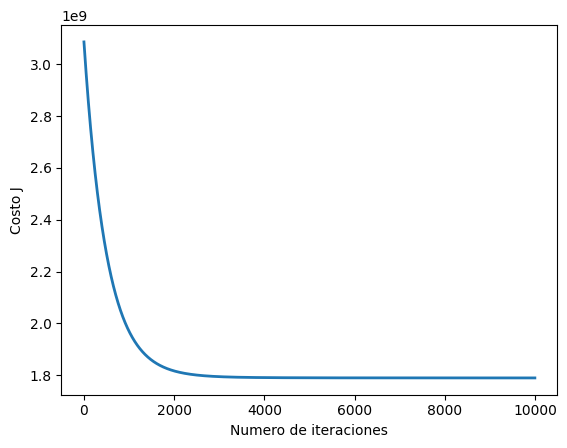

In [33]:
theta = np.zeros(X_ready.shape[1])

num_ite = 10000
alpha = 0.001

theta, J_historico = gradientDescentMulti(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


In [36]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

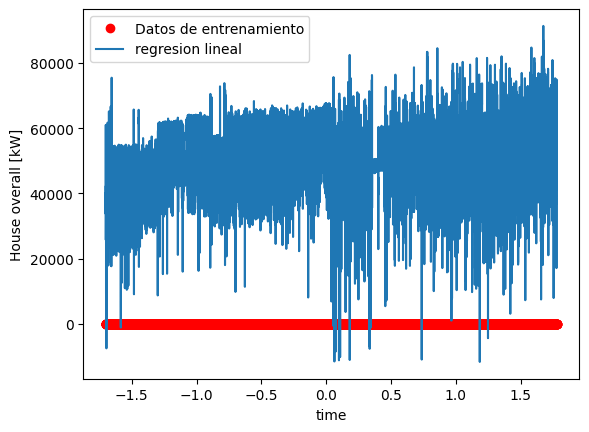

In [42]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
# Ajustar theta a un vector columna

graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [45]:
# 2300,4,449900
# Definir theta con más de un elemento
theta = np.array([0.1, 0.2, 0.3])
y_pred = np.dot([1, 2305, 4], theta)
print(y_pred)

462.3


In [55]:
# Cargar el conjunto de datos
data = pd.read_csv('/content/gdrive/MyDrive/SIS420 1.2024/primer parcial/D1/Boats_Cleaned_dataset.csv', delimiter=',')

# Procesamiento de frases o palabras
columnas_categoricas = data.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
    le = LabelEncoder()
    data[columna] = le.fit_transform(data[columna])

# Rellenar los valores NaN con 0
data = data.fillna(0)

# Normalizar las características
X = data.drop('price', axis=1)  # Excluir la columna objetivo
X = (X - X.mean()) / X.std()  # Normalizar las características

# Convertir X a una matriz NumPy
X_ren = np.array(X)

In [56]:
def calcularThethaEcuacionNormal(X, y):
 #def calcularThethaEcuacionNormal(X, y):
    X = np.array(X)  # Convertir X a una matriz NumPy
    y = np.array(y)
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

In [57]:
X_ren = np.array(X_ren)  # Convertir X_ren a una matriz NumPy
y = np.array(y)  # Convertir y a una matriz NumPy
theta = calcularThethaEcuacionNormal(X_ren, y)
print(f"Los valores de theta calculados son: {theta}")

Los valores de theta calculados son: [-6.36799058e-10  1.46708942e-07 -4.90834928e-10  1.83691284e-10
  3.28959970e-10 -3.65737662e-10 -2.73342238e-10  2.75910850e-10
 -1.37293732e-10 -3.72636644e-11  2.66374922e-10  2.55824251e-10
  4.24924318e-10 -1.38999923e-09  2.97579295e-10  2.21319318e-09
 -2.14980034e-09 -1.48924961e-09  6.07255921e+04  2.85039548e-10
 -6.46792842e-10  1.14320020e-09  3.32729542e-08 -4.23642099e-08
 -1.80281290e-07]


In [64]:

X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [65]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [67]:
# Definir un array con el término de intercepción y las características
X_array = np.array([1, 1650, 3])  # Añadir el término de intercepción (1) al principio

# Si la longitud de theta es 26, añade ceros adicionales a X_array
if len(theta) > len(X_array):
    X_array = np.concatenate(([1], X_array, np.zeros(len(theta) - len(X_array) - 1)))

# Calcular el precio previsto
price = np.dot(X_array, theta)

# Imprimir el precio previsto
print('Precio previsto para una casa con una superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación normal): ${:.0f}'.format(price))

Precio previsto para una casa con una superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación normal): $49892
